In [94]:
from draw3d import draw3d, Points3D, Arrow3D
from math import cos, sin, pi, sqrt

In [95]:
def subtract(v1, v2):
#     print('v1:', v1)
#     print('v2:', v2)
    
    return tuple( v1 - v2 for (v1, v2) in zip(v1, v2) )

def cross(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

def face_vertex_coords(vertices, face_vertex_i):
    return [ vertices[fv_i] for fv_i in face_vertex_i]


def getNormal(face_vertices):
    u = subtract(face_vertices[1], face_vertices[0])
    v = subtract(face_vertices[2], face_vertices[0])
    
#     print('u:', u)
#     print('v:', v)
    
    return ( cross(u, v) )

def magnitude(v):
    return sqrt(sum([coord ** 2 for coord in v]))

def scale(scalar, vector):
    return tuple(scalar * coord for coord in vector)

def unit(vector):
    return scale(1./magnitude(vector), vector)

def component(vector, direction):
    return ( dot(vector, direction) / magnitude(direction))

In [96]:
vertices = (
    (0, 0, -1), # bottom point -Z
    (1, 0, 0), (0, 1, 0), (0, -1, 0), (-1, 0, 0), # plane XOY
    (0, 0, 1) # top point +Z
)

# face_point_ies = (
#     (0, 1, 2),(0, 1, 3), (0, 3, 4), (0, 2, 4), # bottom faces
#     (1, 2, 5), (1, 3, 5), (3, 4, 5), (2, 4, 5)  # top faces
# )

face_point_ies = (
#     (0, 1, 2),
#     (0, 1, 3),
#     (0, 3, 4),
#     (0, 2, 4),
#     (1, 2, 5),
#     (1, 3, 5),
    (3, 4, 5),
#     (2, 4, 5),
)

In [97]:
len_face_point_ies = len(face_point_ies)
print('len_face_point_ies:', len_face_point_ies)

face_coords = []
face_normals = []

if len_face_point_ies == 1:
    face_coords = face_point_coords(vertices, face_point_ies[0])
    face_normals = [getNormal(face_coords)]
else:
    face_coords = [face_point_coords(vertices, fp_i) for fp_i in face_point_ies]
    face_normals = [getNormal(fc) for fc in face_coords]

print('face coords:')
print(face_coords)

print('normals:')
print(face_normals)

len_face_point_ies: 1
face coords:
[(0, -1, 0), (-1, 0, 0), (0, 0, 1)]
normals:
[(1, 1, -1)]


len_normals: 1


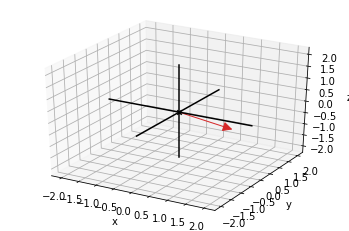

In [98]:
len_normals = len(face_normals)
print('len_normals:', len_normals)

normal = [Arrow3D(norm_vec) for norm_vec in face_normals]

draw3d(*normal)

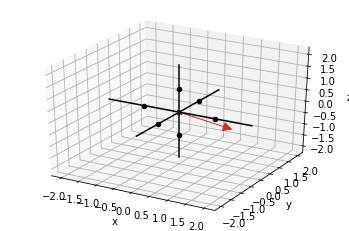

In [99]:
y_axia = (0, 1, 0)

direct = y_axia

angle = pi / 6

#  = [coord / cos(angle) for coord in y_axia]
# print(pr)

octa_verticies = [Points3D(vertex) for vertex in vertices]

# print(octa_verticies)

draw3d(
    *octa_verticies,
    *normal
)

In [100]:
face_unit_normals = [unit(nolmal) for nolmal in face_normals]
print('unit normals:')
print(face_unit_normals)

unit normals:
[(0.5773502691896258, 0.5773502691896258, -0.5773502691896258)]


len unit_normal: 1


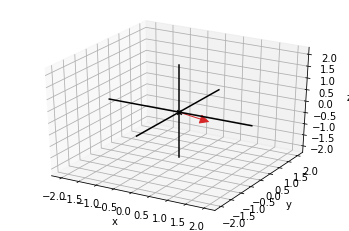

In [101]:
len_unit = len(face_unit_normals)

print('len unit_normal:', len_unit)

units = [Arrow3D(unit) for unit in face_unit_normals]

draw3d(*units)